In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')
os.makedirs("plots", exist_ok=True)

In [2]:
train = pd.read_csv('/kaggle/input/customer-segmentation/Train.csv')
test = pd.read_csv('/kaggle/input/customer-segmentation/Test.csv')

train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index=True)

Project 3: Customer Segmentation Using K-Means

Problem Statement:

Businesses need to target different customers differently based
on behavior.

Objective:

Cluster customers into groups using unsupervised learning.
Requirements:

Use K-Means clustering on data (age, income, frequency,
spending)

Preprocess data using scaling

Visualize clusters using 2D or 3D scatter plots
Expected Outcome:

Identify 3–5 meaningful customer types for marketing or offers.

In [ ]:
train.head()

In [4]:
train['Work_Experience']=train['Work_Experience'].round(2)

In [5]:
data['Work_Experience'].fillna(data['Work_Experience'].median(), inplace=True)
data['Family_Size'].fillna(data['Family_Size'].median(), inplace=True)
data['Var_1'].fillna(data['Var_1'].mode()[0], inplace=True)

In [16]:
train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [6]:
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [7]:
features = ['Age', 'Work_Experience', 'Family_Size']
features += [col for col in data.columns if col.startswith((
    'Gender_', 'Ever_Married_', 'Graduated_', 'Profession_', 'Spending_Score_', 'Var_1_'))]

X = data[data['source'] == 'train'][features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

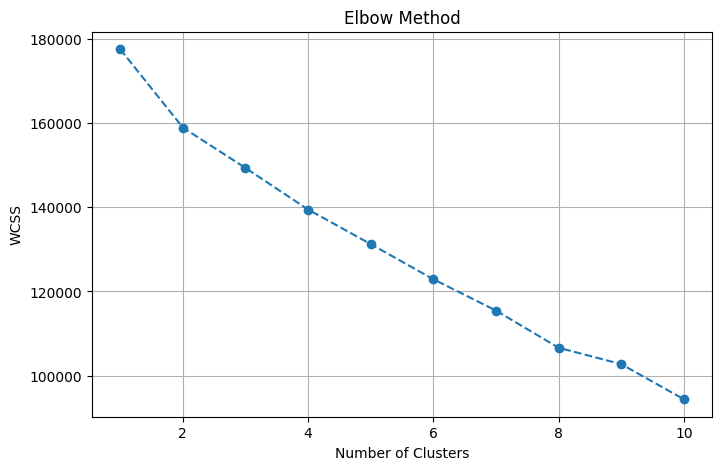

In [11]:
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.savefig('plots/elbow_method.png')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
train_clusters = kmeans.fit_predict(X_scaled)

data.loc[data['source'] == 'train', 'Cluster'] = train_clusters

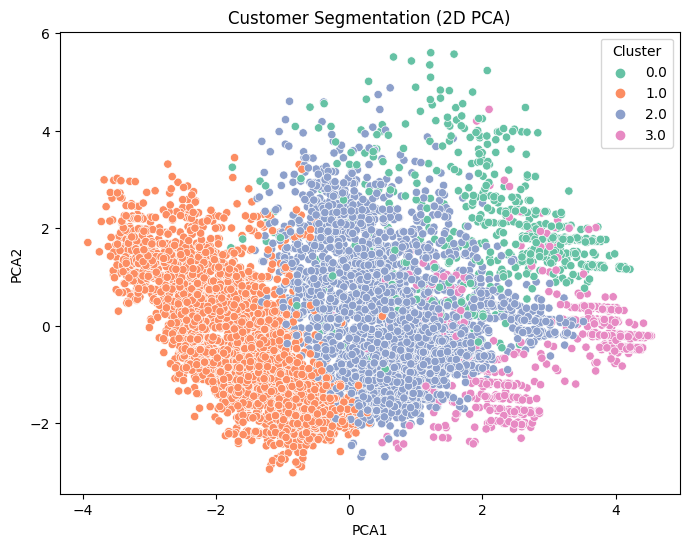

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

data.loc[data['source'] == 'train', 'PCA1'] = X_pca[:, 0]
data.loc[data['source'] == 'train', 'PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data[data['source'] == 'train'], x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (2D PCA)')
plt.savefig('plots/2d_pca_clusters.png')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
cat=train.select_dtypes(include=['object']).columns.tolist()
ss=['Age']
mms=['Work_Experience','Family_Size',]

preprocessing = ColumnTransformer([('scaler',StandardScaler(),ss),
                                  ('mms',MinMaxScaler(),mms),
                                 ('encoder',OneHotEncoder(drop='first'),cat)])
x_pre=preprocessing.fit_transform(train)
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(x_pre)
train['cluster']=train.labels_

In [15]:
cluster_summary = data[data['source'] == 'train'].groupby('Cluster')[['Age', 'Work_Experience', 'Family_Size']].mean()
print(cluster_summary)

               Age  Work_Experience  Family_Size
Cluster                                         
0.0      51.275630         2.169748     3.428571
1.0      31.698380         2.860383     3.012371
2.0      47.940428         2.374494     2.762580
3.0      75.464516         1.191935     1.975806


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cat = train.select_dtypes(include=['object']).columns.tolist()
ss = ['Age']
mms = ['Work_Experience', 'Family_Size']

# Preprocessing
preprocessing = ColumnTransformer([
    ('scaler', StandardScaler(), ss),
    ('mms', MinMaxScaler(), mms),
    ('encoder', OneHotEncoder(drop='first'), cat)
])

x_pre = preprocessing.fit_transform(train)

# Loop to find silhouette score for each k
for k in range(2, 10):  # k=1 is invalid for silhouette
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(x_pre)
    score = silhouette_score(x_pre, labels)
    print(f"k={k}, silhouette score={score:.4f}")


k=2, silhouette score=0.2064
k=3, silhouette score=0.1582
k=4, silhouette score=0.1392
k=5, silhouette score=0.1354
k=6, silhouette score=0.1356
k=7, silhouette score=0.1391
k=8, silhouette score=0.1319
k=9, silhouette score=0.1329
